imports

In [20]:
import torch
from dataset import CustomDataset, TRAINING_DATA_DIR, TESTING_DATA_DIR, VALIDATION_DATA_DIR
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [26]:
torch.cuda.empty_cache()
EPOCHS = 100

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_dataset = CustomDataset(TRAINING_DATA_DIR)
test_dataset = CustomDataset(TESTING_DATA_DIR)
val_dataset = CustomDataset(VALIDATION_DATA_DIR)

print(f'Training set size: {len(train_dataset)}')
print(f'Test set size: {len(test_dataset)}')
print(f'Validation set size: {len(val_dataset)}')

print(train_dataset[0])

def collate_fn(batch):
    images, targets = zip(*batch)  # Unpack batch
    images = torch.stack(images)  # Convert list of tensors to a batch tensor
    return images, targets  # Targets remain as a list of dictionaries

dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True, collate_fn=collate_fn)

# 3. Iterate Through DataLoader
for batch_data, batch_labels in dataloader:
    # Process batch_data and batch_labels
    print(batch_data.shape, batch_labels.shape)

Training set size: 6222
Test set size: 500
Validation set size: 732
(<PIL.Image.Image image mode=RGB size=720x720 at 0x7FF6BFA7AB50>, {'boxes': tensor([[525., 268., 105.,  71.]]), 'labels': tensor([1])}, 'dataset/train/Thu_Jul__6_20_21_19_2023__mp4-7_jpg.rf.0016bc4af87fa9e934e4d893909d1bca.jpg')


ValueError: too many values to unpack (expected 2)

tensor(525.) tensor(268.) tensor(105.) tensor(71.)


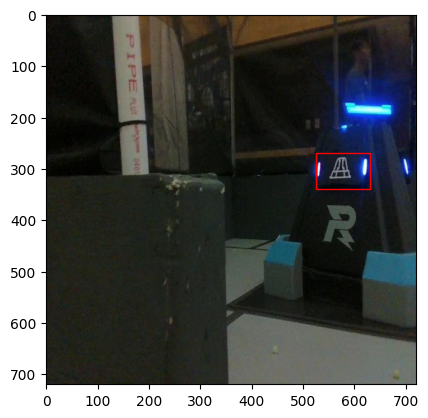

(<PIL.Image.Image image mode=RGB size=720x720 at 0x7FF6B857C0A0>, {'boxes': tensor([[525., 268., 105.,  71.]]), 'labels': tensor([1])}, 'dataset/train/Thu_Jul__6_20_21_19_2023__mp4-7_jpg.rf.0016bc4af87fa9e934e4d893909d1bca.jpg')


In [23]:
def show_image_with_labels(image, labels):
        fig, ax = plt.subplots(1)
        # Transpose the image tensor and convert to numpy array
        ax.imshow(np.array(image))

        # Assuming labels are bounding boxes [x_min, y_min, x_max, y_max]
        for label in labels:
            rect = patches.Rectangle((label[0], label[1]), label[2], label[3], linewidth=1, edgecolor='r', facecolor='none')
            print(label[0], label[1], label[2], label[3])  
            ax.add_patch(rect)
        plt.show()

sample = train_dataset[0]
show_image_with_labels(sample[0], sample[1]["boxes"])
print(sample)